In [1]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
import pandas as pd
import sklearn.decomposition as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

### Principal Component Analysis ###

In [2]:
class PCA:

    def __init__(self, k):
        self.k = k
        pass

    def fit(self, feature, labels):
        cov_matrix = np.cov(feature, rowvar = False)
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        sorted_indices = np.argsort(eigenvalues)
        eigenvectors = eigenvectors[sorted_indices]
        

        # Form the Transformation Matrix W
        W = np.zeros((self.k, len(feature[0])))
        for i in range(len(eigenvectors)-1, len(eigenvectors)-1-self.k, -1):
            W[i-(len(eigenvectors)-self.k)] = eigenvectors[i]
        W = np.transpose(W)

        # Project Data onto Feature Space
        red_data = np.dot(feature, W)
        cum_exp_var_r = np.array([])
        sum_eig = np.sum(eigenvalues[len(eigenvectors)-self.k:])
        sum_loop = 0
        for i in range(len(eigenvectors)-self.k, len(eigenvectors)):
            sum_loop += eigenvalues[i]
            if (sum_eig == 0):
                cum_exp_var_r = np.append(cum_exp_var_r, np.array([0]))
            else:
                cum_exp_var_r = np.append(cum_exp_var_r, np.array([sum_loop/sum_eig]))

        num_pc = np.arange(self.k)+1
        self.components = W
        return cum_exp_var_r, num_pc, red_data


    def transform(self, feature):
        return np.dot(feature, self.components)
    
    
    def classify(self):
        pass

In [3]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [4]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        # plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [5]:
dirpath = 'IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


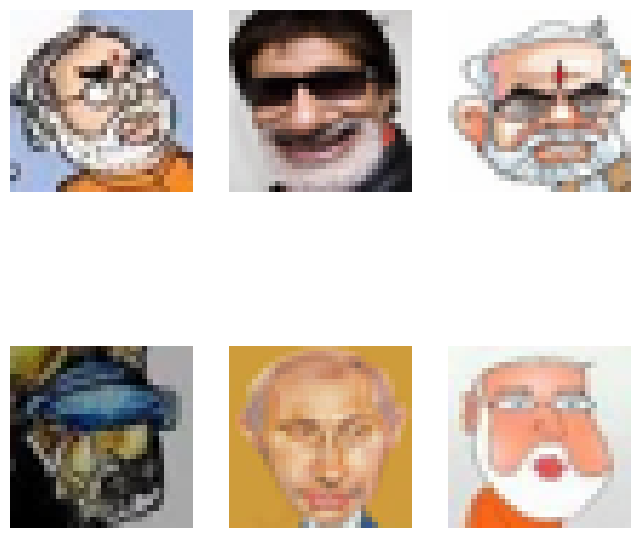

(6, 32, 32, 3)

In [6]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)
np.shape(X[ind])

### PCA 1.1.1 and 1.1.2 ###

[]

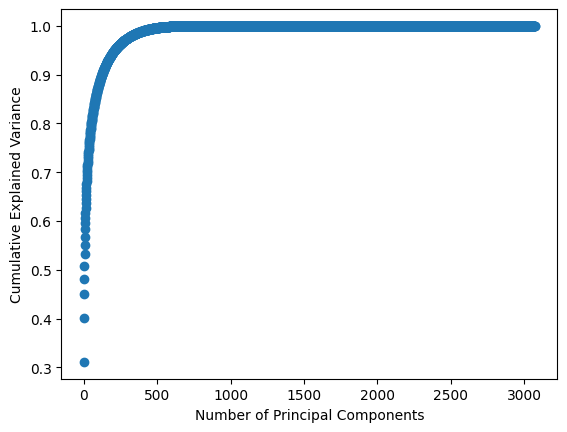

In [7]:
import warnings
warnings.filterwarnings('ignore')
flatten = np.zeros((len(X), 3072))
for i in range(len(X)):
    flattened_arr = X[i].reshape(-1)
    flatten[i] = flattened_arr

mean = np.mean(flatten, axis = 0)
sd = np.std(flatten, axis = 0)
flatten -= mean
flatten = flatten / sd
pca = PCA(len(flatten[0]))
cum_exp_var_r, num_pc, red_data = pca.fit(flatten, y)
plt.scatter(num_pc, cum_exp_var_r)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot()

### Pictionary Dataset Dimensionality Reduction 1.1.3 ###

0.28

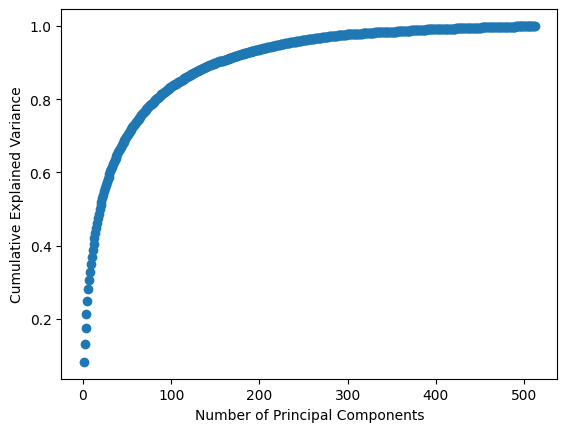

In [8]:
# Dimensionality Reduction is done for ResNET Encoding

file = np.load("data.npy", allow_pickle=True)
i = 0

data_vit = []
labels = []

for i in range(0, len(file)):
    data1 = np.array(file[i][2][0])
    data_vit.append(data1)
    labels.append(file[i][3])

label_index = np.arange(len(data_vit[0]))+1 
mean = np.mean(data_vit, axis = 0)
sd = np.std(data_vit, axis = 0)
data_vit -= mean
data_vit = data_vit / sd

pca = PCA(512)
cum_exp_var_r, num_pc, red_data = pca.fit(data_vit, labels)
plt.scatter(num_pc, cum_exp_var_r)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot()

knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(red_data, labels, test_size=0.2, random_state = 10)

prediction = []
predicted_val = ''
knn.fit(X_train, y_train)
for j in range(len(X_test)):
    dataset = X_test[j]
    dataset = np.array([dataset])
    predicted_val = knn.predict(dataset)
    prediction.append(predicted_val)
    # prediction_real.append(predicted_val)

accuracy = accuracy_score(y_test, prediction)
accuracy

### PCA Pictionary Dataset 1.1.3 ###

[0.         0.01666667 0.02       0.02333333 0.05666667 0.04
 0.05333333 0.06       0.08666667 0.11333333 0.06666667 0.07666667
 0.09       0.06666667 0.12333333 0.12       0.14       0.13
 0.11666667 0.12333333 0.12666667 0.15333333 0.14333333 0.17
 0.13       0.15333333 0.13666667 0.13666667 0.12666667 0.12333333
 0.14666667 0.18       0.2        0.14333333 0.16666667 0.16333333
 0.16666667 0.14666667 0.16       0.17       0.18333333 0.15333333
 0.14666667 0.19       0.16666667 0.2        0.15666667 0.15333333
 0.19       0.16666667 0.19666667 0.20333333 0.17       0.18333333
 0.19666667 0.14666667 0.18666667 0.15333333 0.18       0.20333333
 0.13333333 0.18333333 0.18333333 0.16       0.19333333 0.22
 0.19333333 0.18666667 0.17       0.20666667 0.21666667 0.20333333
 0.19333333 0.20333333 0.18       0.19666667 0.21333333 0.22
 0.21       0.2        0.18333333 0.20666667 0.23       0.19666667
 0.20333333 0.22       0.2        0.17666667 0.21333333 0.2
 0.19       0.21666667 0.2433333

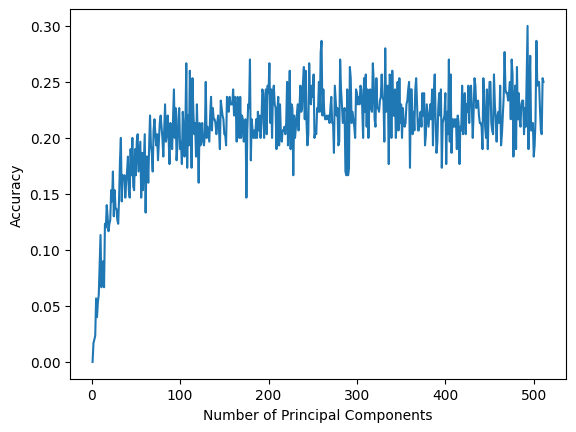

In [9]:
# Dimensionality Reduction is done for ResNET Encoding

file = np.load("data.npy", allow_pickle=True)
i = 0

data_vit = []
labels = []

for i in range(0, len(file)):
    data1 = np.array(file[i][2][0])
    data_vit.append(data1)
    labels.append(file[i][3])

label_index = np.arange(len(data_vit[0]))+1 
mean = np.mean(data_vit)
sd = np.std(data_vit)
data_vit -= mean
data_vit = data_vit / sd

accuracy_l = np.array([])
precision_l = np.array([])
recall_l = np.array([])
f1_score_l = np.array([])
for i in range(1, data_vit.shape[1]):
    pca = PCA(i)
    cum_exp_var_r, num_pc, red_data = pca.fit(data_vit, labels)

    knn = KNeighborsClassifier()
    X_train, X_test, y_train, y_test = train_test_split(red_data, labels, test_size=0.2, random_state = None)

    prediction = []
    predicted_val = ''
    knn.fit(X_train, y_train)
    for j in range(len(X_test)):
        dataset = X_test[j]
        dataset = np.array([dataset])
        predicted_val = knn.predict(dataset)
        prediction.append(predicted_val)
        # prediction_real.append(predicted_val)

    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction, average = 'weighted')
    recall = recall_score(y_test, prediction, average = 'weighted')
    f1 = f1_score(y_test, prediction, average = 'weighted')
    accuracy_l = np.append(accuracy_l, np.array([accuracy]))
    precision_l = np.append(precision_l, np.array([precision]))
    recall_l = np.append(recall_l, np.array([recall]))
    f1_score_l = np.append(f1_score_l, np.array([f1]))

plt.plot(num_pc, accuracy_l)
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.plot()
print(accuracy_l)
print(precision_l)
print(recall_l)
print(f1_score_l)

### Observations in 1.1.3 ###

We observe that as the Value of Principal Components reaches around 250, rather than 300, more or less the same accuracy is observed in the Dataset. All the other metrics also show the same trend. That is, as the number of dimensions increase beyond a certain point, then not much increase in accuracy is observed. It is because the Cumulative Explained Variance almost reaches to 1 and thus the net information related to the Dataset is also fulfilled, leading to the Above described results.

### PCA Dimensionality Reduction 1.1.4 ###

In [10]:
import warnings
warnings.filterwarnings('ignore')

flatten = np.zeros((len(X), 3072))
for i in range(len(X)):
    flattened_arr = X[i].reshape(-1)
    flatten[i] = flattened_arr

mean = np.mean(flatten, axis = 0)
sd = np.std(flatten, axis = 0)
flatten -= mean
flatten = flatten / sd

X_train, X_test, y_train, y_test = train_test_split(flatten, y, test_size=0.2, random_state = None)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy on original dataset:", accuracy)

accuracy_l = np.array([])
pca = PCA(X_train.shape[1])
cum_exp_var_r, num_pc, X_train_data = pca.fit(X_train, y)
eigenvectors = pca.components

for i in range(1, X_train.shape[1] + 1):
    W = eigenvectors[len(eigenvectors)-i-1 : ]
    W = np.transpose(W)
    X_test_data = np.dot(X_test, W)

    knn = KNeighborsClassifier()
    X_train_data = np.dot(X_train, W)
    knn.fit(X_train_data, y_train)
    y_pred = knn.predict(X_test_data)
    accuracy = accuracy_score(y_pred, y_test)
    accuracy_l = np.append(accuracy_l, np.array([accuracy]))

print("Accuracy on modified dataset by Varying Principal Components is:")
print(accuracy_l)

Accuracy on original dataset: 0.31851851851851853
Accuracy on modified dataset by Varying Principal Components is:
[0.14074074 0.13333333 0.14074074 ... 0.36296296 0.40740741 0.13333333]


### 1.2 Pictionary Dataset ###

Drawer Dataset PCA
drawer data shape =  (100, 9)


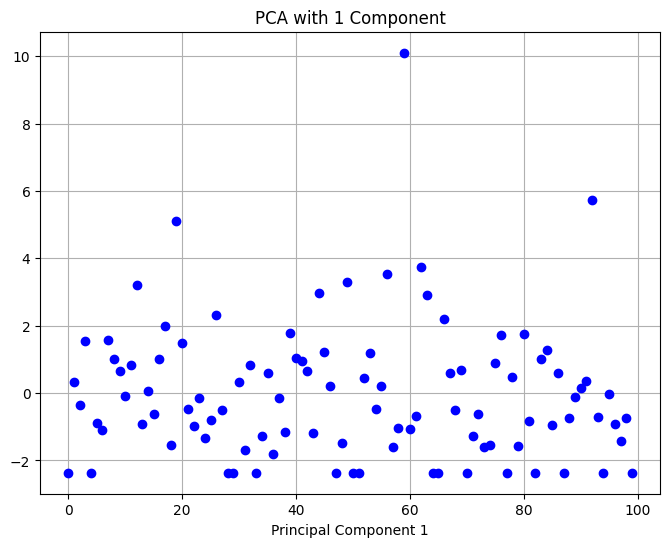

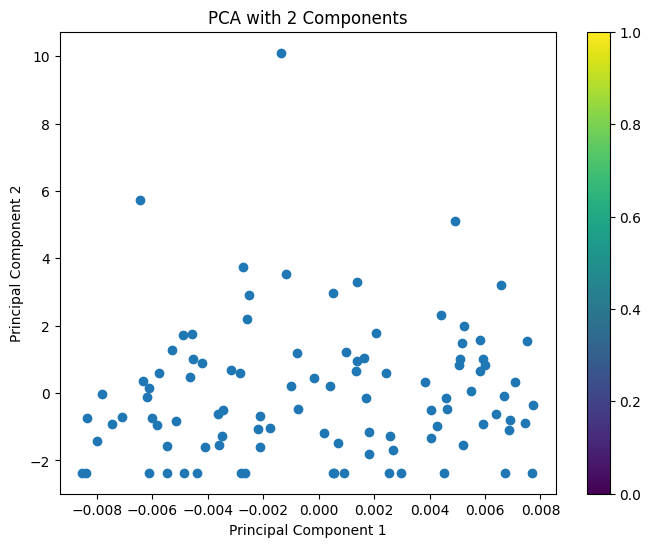

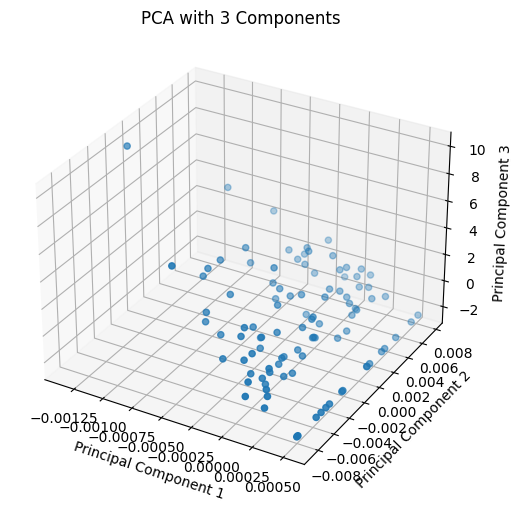

Guesser Dataset PCA
guesser data shape =  (100, 7)


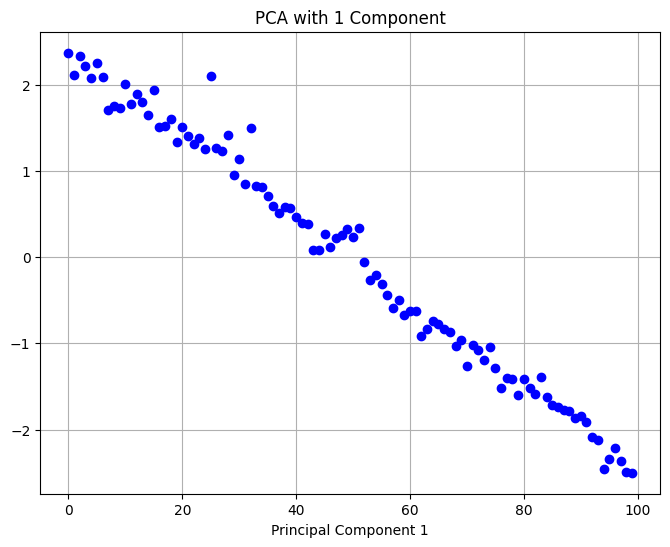

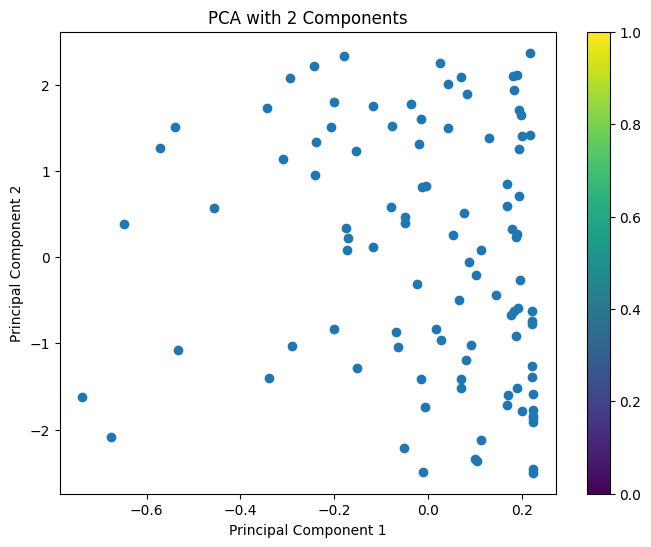

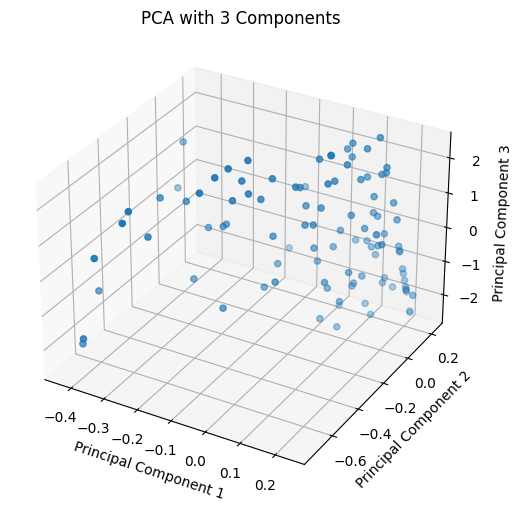

In [12]:
drawer_data = pd.read_csv('./smai_assignment_pictionary/drawer_attributes.csv')
guesser_data = pd.read_csv('./smai_assignment_pictionary/guesser_attributes.csv')
drawer_data = np.array([drawer_data])
guesser_data = np.array([guesser_data])


# PCA applied for Drawer Attributes
print("Drawer Dataset PCA")


drawer_data = drawer_data.reshape((len(drawer_data[0]), len(drawer_data[0][0])))
print("drawer data shape = ", np.shape(drawer_data))

mean = np.mean(drawer_data, axis = 0)
sd = np.std(drawer_data)
drawer_data -= mean
drawer_data = drawer_data / sd


pca = PCA(1)
cum_exp_var_r, num_pc, red_data_drawer = pca.fit(drawer_data, y)
plt.figure(figsize=(8, 6))

plt.plot(red_data_drawer, 'bo')  # 'bo' means blue circles
plt.xlabel('Principal Component 1')
plt.title('PCA with 1 Component')
plt.grid()
plt.show()

pca = PCA(2)
cum_exp_var_r, num_pc, red_data_drawer = pca.fit(drawer_data, y)

plt.figure(figsize=(8, 6))
plt.scatter(red_data_drawer[:, 0], red_data_drawer[:, 1], cmap='viridis')  # y is the target labels if available
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with 2 Components')
plt.colorbar()
plt.show()


pca = PCA(3)
cum_exp_var_r, num_pc, red_data_drawer = pca.fit(drawer_data, y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(red_data_drawer[:, 0], red_data_drawer[:, 1], red_data_drawer[:, 2], cmap='viridis')  # y is the target labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA with 3 Components')
plt.show()


# PCA applied for Guesser Attributes
print("Guesser Dataset PCA")

guesser_data = guesser_data.reshape((len(guesser_data[0]), len(guesser_data[0][0])))
print("guesser data shape = ", np.shape(guesser_data))

mean = np.mean(guesser_data, axis = 0)
sd = np.std(guesser_data)
guesser_data -= mean
guesser_data = guesser_data / sd


pca = PCA(1)
cum_exp_var_r, num_pc, red_data_guesser = pca.fit(guesser_data, y)
plt.figure(figsize=(8, 6))
plt.plot(red_data_guesser[:, 0], 'bo')  # 'bo' means blue circles
plt.xlabel('Principal Component 1')
plt.title('PCA with 1 Component')
plt.grid()
plt.show()


pca = PCA(2)
cum_exp_var_r, num_pc, red_data_guesser = pca.fit(guesser_data, y)

plt.figure(figsize=(8, 6))
plt.scatter(red_data_guesser[:, 0], red_data_guesser[:, 1], cmap='viridis')  # y is the target labels if available
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with 2 Components')
plt.colorbar()
plt.show()


pca = PCA(3)
cum_exp_var_r, num_pc, red_data_guesser = pca.fit(guesser_data, y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(red_data_guesser[:, 0], red_data_guesser[:, 1], red_data_guesser[:, 2], cmap='viridis')  # y is the target labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA with 3 Components')
plt.show()

### 1.2 Explanation Part ###
The new axes obtained from the PCA represent the directions of the Maximum Variation as well as Orientation, or put simply the Directions with the Maximum spread and information. That is majority of the Information stored is in the Direction of the Principal Components. Also, these Principal Components are eigenvectors orthogonal to each other. So what happens in the above part is the Points are themselves visualised in terms of the Directions with the maximum spread and information, i.e the Principal Component eigenvectors. Correspondingly the above plots of visualisation are obtained.